# 0.) Import the Credit Card Fraud Data From CCLE

In [2]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# drive.mount('/content/gdrive/', force_remount = True)

In [3]:
df = pd.read_csv("fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/gc/v4x_53fj4fs7khd8jptvwj2w0000gn/T/ipykernel_23374/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/gc/v4x_53fj4fs7khd8jptvwj2w0000gn/T/ipykernel_23374/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [16]:
over_log.score(X_test, y_test)

0.907891264185801

In [17]:
under_log.score(X_test, y_test)

0.8931476283020227

In [18]:
smote_log.score(X_test, y_test)

0.9086590369250702

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_true = y_test

In [21]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75437,  7601],
       [   77,   243]])

In [22]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.759375


In [23]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74203,  8835],
       [   72,   248]])

In [24]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.775


In [25]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75501,  7537],
       [   77,   243]])

In [26]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.759375


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [52]:
raw_temp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], ignore_index = False, axis = 1)

In [49]:
raw_temp.columns = list(X.columns)+["is_fraud"]
raw_temp

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
0,-0.076519,-0.288456,-1.533520,-0.278788,-0.274843,-0.335849,-0.189479,-0.323533,-0.266833,-0.322154,-0.310086,4.385924,-0.258438,-0.27574,-0.28443,-0.313595,-0.18063,0.0
1,-0.284161,-0.292677,-1.012898,-0.278788,-0.274843,-0.335849,-0.189479,-0.323533,-0.266833,3.104106,-0.310086,-0.228002,-0.258438,-0.27574,-0.28443,-0.313595,-0.18063,0.0
2,-0.226122,-0.227774,-0.434430,-0.278788,-0.274843,-0.335849,-0.189479,-0.323533,3.747663,-0.322154,-0.310086,-0.228002,-0.258438,-0.27574,-0.28443,-0.313595,-0.18063,0.0
3,-0.191936,-0.179464,0.086192,-0.278788,-0.274843,-0.335849,-0.189479,-0.323533,-0.266833,-0.322154,-0.310086,-0.228002,-0.258438,-0.27574,-0.28443,3.188827,-0.18063,0.0
4,0.021113,1.715722,-0.550124,-0.278788,-0.274843,2.977526,-0.189479,-0.323533,-0.266833,-0.322154,-0.310086,-0.228002,-0.258438,-0.27574,-0.28443,-0.313595,-0.18063,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
402911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
506669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
420283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


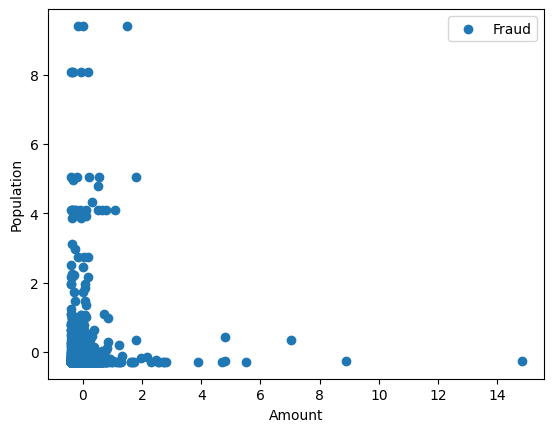

In [50]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [74]:
raw_temp = pd.concat([pd.DataFrame(raw_temp, columns = X.columns), pd.DataFrame(smote_y, columns = ["is_fraud"])], ignore_index= False,axis = 1) 

In [75]:
raw_temp.columns = list(X.columns) + ["is_fraud"]

/Users/echoxyliu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


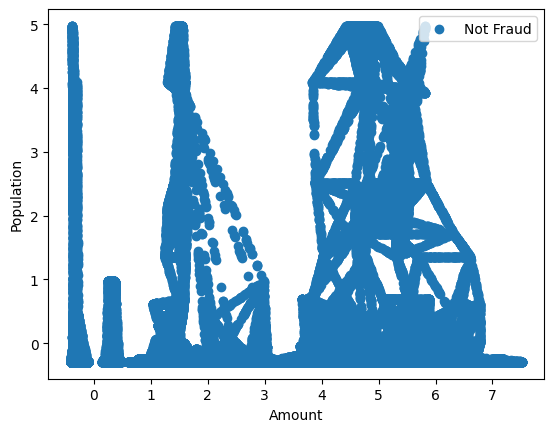

In [76]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [84]:
resampling_methods = {
    "over": RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs = {
    "LOG": LogisticRegression(),
    "LASSO": LogisticRegression(penalty = 'l1', solver = 'liblinear', C = .5),
    "DecisionTree": DecisionTreeClassifier()
}

In [91]:
def calc_perf_metrics(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1_score = 2*precision*recall/(precision+recall)
    
    print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, recall:{recall},F1_score:{F1_score}")

In [92]:
trained_models = {}

for resample_key,resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_name, model in model_configs.items():
        combined_key = f"{resample_key}_{model_name}"
        trained_models[combined_key] = model.fit(resample_X, resample_y)
        
        print(f"{combined_key} : {trained_models[combined_key].score(X_test, y_test)}") 
        y_pred = trained_models[combined_key].predict(X_test)
        y_true = y_test
        calc_perf_metrics(y_true, y_pred)
        print("\n\n")

over_LOG : 0.9073154346313491
sensitivity: 0.759375, specificity: 0.9078855463763578, precision: 0.03079067410035479, recall:0.759375,F1_score:0.05918168533852899



over_LASSO : 0.9073874133256556
sensitivity: 0.759375, specificity: 0.9079578024518895, precision: 0.030814100938371797, recall:0.759375,F1_score:0.059224957348281745



over_DecisionTree : 0.9966769836128506
sensitivity: 0.55, specificity: 0.9983983236590477, precision: 0.56957928802589, recall:0.55,F1_score:0.5596184419713831



under_LOG : 0.8749010292953285
sensitivity: 0.765625, specificity: 0.8753221416700787, precision: 0.023117569352708058, recall:0.765625,F1_score:0.044880014654698666



under_LASSO : 0.8776962019242305
sensitivity: 0.765625, specificity: 0.8781280859365591, precision: 0.02363724071394115, recall:0.765625,F1_score:0.045858680393074405



under_DecisionTree : 0.9425010196981694
sensitivity: 0.965625, specificity: 0.9424119078012476, precision: 0.06069534472598703, recall:0.965625,F1_score:0.1142117

I choose F1 score as the main decision criteria, since F1 score is more powerful in dealing with imbalanced data. The higher the F1 score, the better the model is. Comparing among models, Decision Tree models perform better. Comparing over/under/smote models, over model performs better. To sum up, I think the Over Decision Tree model is the best.